## Import The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing The Dataset

In [2]:
data=pd.read_excel(r"C:\Users\madhu suresh\Downloads\Crude Oil Prices Daily.xlsx")
data

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
8218,2018-07-03,74.19
8219,2018-07-04,NaN
8220,2018-07-05,73.05
8221,2018-07-06,73.78


## Handling Missing Data

In [3]:
data.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [4]:
data.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [5]:
data.dropna(axis=0,inplace=True)

In [6]:
data.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [7]:
data_oil=data.reset_index()['Closing Value']
data_oil

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

## Feature Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_oil=scaler.fit_transform(np.array(data_oil).reshape(-1,1))

## Data Visualization

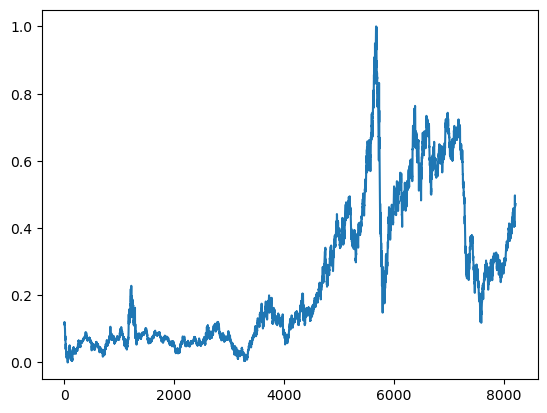

In [9]:
plt.plot(data_oil)

## Splitting Data Into Train And Test 

In [10]:
training_size=int(len(data_oil)*0.65)
test_size=len(data_oil)-training_size
train_data,test_data=data_oil[0:training_size:],data_oil[training_size:len(data_oil),:1]

In [11]:
training_size,test_size

(5340, 2876)

In [12]:
train_data.shape

(5340, 1)

## Creating A Dataset With Sliding Windows

In [13]:
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [14]:
time_step=10
x_train,y_train=create_dataset(train_data,time_step)
x_test,ytest=create_dataset(test_data,time_step)

In [15]:
print(x_test.shape)
print(ytest.shape)

(2865, 10)
(2865,)


In [16]:
print(x_train.shape),print(y_train.shape)

(5329, 10)
(5329,)


(None, None)

In [17]:
x_train

array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.36731823, 0.35176958, 0.36080261, ..., 0.36391234, 0.37042796,
        0.37042796],
       [0.35176958, 0.36080261, 0.35354657, ..., 0.37042796, 0.37042796,
        0.37879461],
       [0.36080261, 0.35354657, 0.35295424, ..., 0.37042796, 0.37879461,
        0.37916482]])

In [18]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_train.shape[1],1)

## Importing The Model Building Libraries 

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

## Initializing The Model

In [21]:
model=Sequential()

## Adding LSTM Layers

In [22]:
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))

## Adding Output Layers

In [23]:
model.add(Dense(1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


## Configure The Learning Process

In [25]:
model.compile(loss='mean_squared_error',optimizer='adam')

## Train The Model

In [26]:
model.fit(x_train,y_train,validation_data=(x_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
84/84 [==============================] - 10s 40ms/step - loss: 0.0018 - val_loss: 7.8491e-04
Epoch 2/50
84/84 [==============================] - 2s 23ms/step - loss: 1.2458e-04 - val_loss: 8.2808e-04
Epoch 3/50
84/84 [==============================] - 2s 26ms/step - loss: 1.1971e-04 - val_loss: 7.3377e-04
Epoch 4/50
84/84 [==============================] - 2s 22ms/step - loss: 1.2129e-04 - val_loss: 8.7799e-04
Epoch 5/50
84/84 [==============================] - 2s 24ms/step - loss: 1.1870e-04 - val_loss: 8.8529e-04
Epoch 6/50
84/84 [==============================] - 2s 26ms/step - loss: 1.2588e-04 - val_loss: 0.0010
Epoch 7/50
84/84 [==============================] - 2s 24ms/step - loss: 1.2309e-04 - val_loss: 0.0011
Epoch 8/50
84/84 [==============================] - 2s 21ms/step - loss: 1.1149e-04 - val_loss: 8.1880e-04
Epoch 9/50
84/84 [==============================] - 2s 19ms/step - loss: 1.1051e-04 - val_loss: 7.3024e-04
Epoch 10/50
84/84 [=============================

## Model Evaluation

In [27]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

90/90 [==============================] - 1s 6ms/step


In [28]:
# model evaluation
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [29]:
#save the model
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

29.40603971934792

## Save The Model

In [30]:
from tensorflow.keras.models import load_model
model.save("crude_oil.h5")

## Test The Model

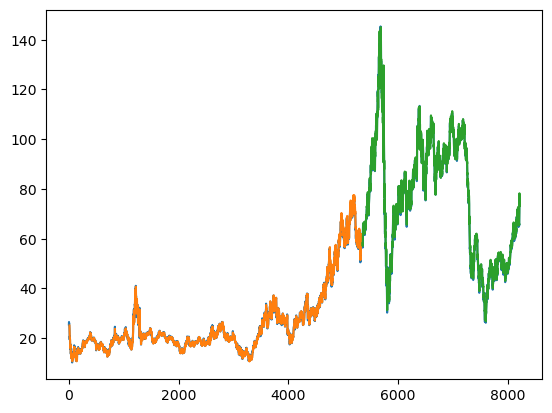

In [31]:
#test the data
look_back=10
trainpredictplot=np.empty_like(data_oil)
trainpredictplot[:, :]=np.nan
trainpredictplot[look_back:len(train_predict)+look_back, :]=train_predict
testpredictplot=np.empty_like(data_oil)
testpredictplot[:, :]=np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(data_oil)-1, :]=test_predict
plt.plot(scaler.inverse_transform(data_oil))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()

In [32]:
len(test_data)

2876

In [33]:
x_input=test_data[2866:].reshape(1,-1)
x_input.shape

(1, 10)

In [34]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [35]:
temp_input

[0.44172960165852215,
 0.48111950244335855,
 0.49726047682511476,
 0.4679401747371539,
 0.4729749740855915,
 0.47119798608026064,
 0.47341922108692425,
 0.4649785280616022,
 0.4703835332444839,
 0.47149415074781587]

In [36]:
lst_output=[]
n_steps=10
i=0
while (i<10):
    if(len(temp_input)>10):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape(1,n_steps,1)
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.47607496]
11
1 day input [0.4811195  0.49726048 0.46794017 0.47297497 0.47119799 0.47341922
 0.46497853 0.47038353 0.47149415 0.47607496]
1 day output [[0.48119003]]
2 day input [0.49726048 0.46794017 0.47297497 0.47119799 0.47341922 0.46497853
 0.47038353 0.47149415 0.47607496 0.48119003]
2 day output [[0.4861873]]
3 day input [0.46794017 0.47297497 0.47119799 0.47341922 0.46497853 0.47038353
 0.47149415 0.47607496 0.48119003 0.48618731]
3 day output [[0.49056533]]
4 day input [0.47297497 0.47119799 0.47341922 0.46497853 0.47038353 0.47149415
 0.47607496 0.48119003 0.48618731 0.49056533]
4 day output [[0.49446633]]
5 day input [0.47119799 0.47341922 0.46497853 0.47038353 0.47149415 0.47607496
 0.48119003 0.48618731 0.49056533 0.49446633]
5 day output [[0.49777645]]
6 day input [0.47341922 0.46497853 0.47038353 0.47149415 0.47607496 0.48119003
 0.48618731 0.49056533 0.49446633 0.49777645]
6 day output [[0.5006322]]
7 day input [0.46497853 0.47038353 0.47149415 0.47607496 0.48119003 

In [37]:
day_new=np.arange(1,11)
day_pred=np.arange(11,21)
len(data_oil)

8216

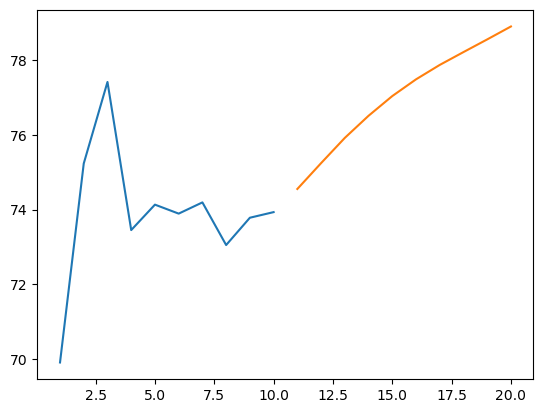

In [38]:
plt.plot(day_new,scaler.inverse_transform(data_oil[8206:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

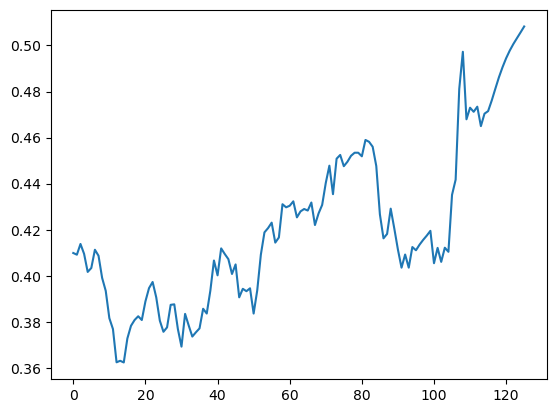

In [39]:
df3=data_oil.tolist()
df3.extend(lst_output)
plt.plot(df3[8100:])

In [40]:
df3=scaler.inverse_transform(df3).tolist()

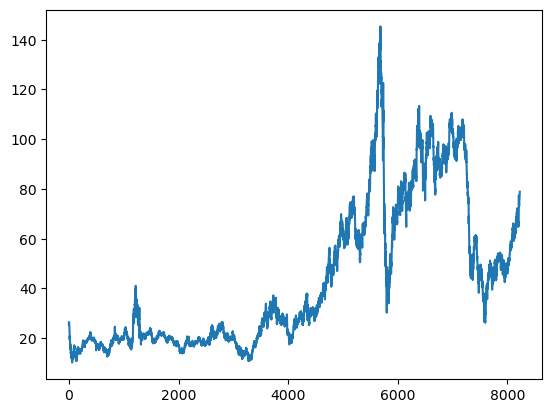

In [41]:
plt.plot(df3)